# Plotter
#### A tool of myutils (YourUtils) to make plots in a simpler way.
##### Created by Daniel Sucerquia (daniel.sucerquia@h-its.org)

In science, we have to make plots all the time. One of the most used plotters in python is matplotlib, which is a very powerful tool to manipulate all the details you could set in your plots. However, many of those settings require long explanations and very specific keywords that are really easy to forget (because of the amount). Besides, the default plots of matplotlib are not the best and each time we create a plot, it is necessary to change the settings again and again.

This tutorial does not aim to replace the whole advantajes of matplotlib but to make it faster and at least define the basics in a very accesible way to any user.

# Setting the plot before adding data.

Before adding the data we can adjust the basic settings of the plot. The next are the options used in StandardPlotter:

In [14]:
sp = StandardPlotter() ; plt.close()
print(sp.axis_setter.__doc__)


        Parameters
        ax: int or axes. default=0
            plt.axes object or index of the axis. In case it is not given, a
            new one will be created.
        xlabel: str. default=''
            label for the x axis.
        ylabel: str. default=''
            label for the y axis.
        xticks: array. default=automatic
            numbers to appear in the x axis.
        yticks: array. default=automatic
            numbers to appear in the y axis.
        xminor: array. default=None
            minor ticks to add to the x axis.
        yminor: array. default=None
            minor ticks to add to the y axis.
        color_labels: RGB array or matplotlib colors. default [0.4, 0.4, 0.4]
            color of the x and y labels
        pstyle: str. default='-'
            matplotlib line style.
        grid: bool. default False
            grid regarding the main ticks (major)
        mingrid: bool. default False
            grid regarding the secundary ticks (minor)
 

### Option 1 for setting axes:
You can define your preferences as a dictionary with the setting options and initialize data directly (useful for "homogeneous setting", namely, all axis of a figure with the same settings)

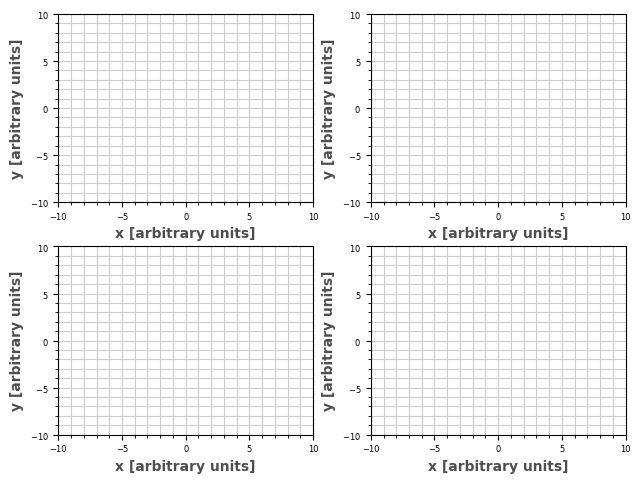

In [15]:
from myutils.plotters import StandardPlotter
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
ax_pref = {'xlabel': 'x [arbitrary units]',
           'ylabel': 'y [arbitrary units]',
           'factor': 4, 
           'xticks': np.arange(-10,10.1, 5),
           'yticks': np.arange(-10,10.1, 5),
           'xminor': np.arange(-10, 10.1, 1),
           'color_labels': [0.3, 0.3, 0.3],
           'yminor': np.arange(-10, 10.1, 1),
           'grid': True,
           'mingrid':  True}

sp = StandardPlotter(fig=fig,
                     ax=axes,
                     ax_pref=ax_pref)

sp.show()


### Option 2:
Another option to define your preferences is using the method axes_setter (useful for individual setting of axes)

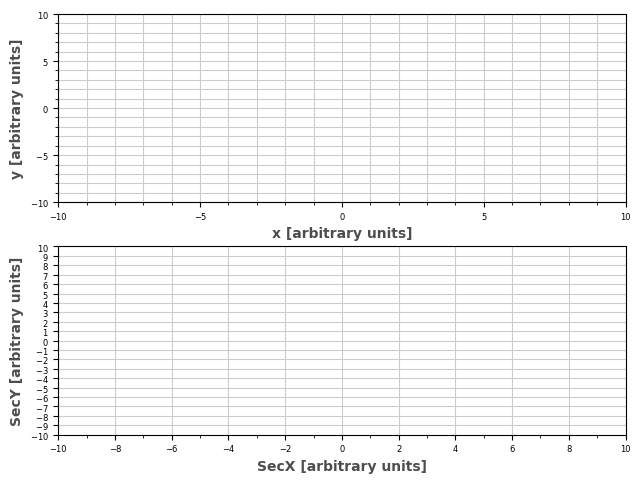

In [17]:
from myutils.plotters import StandardPlotter
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)

sp = StandardPlotter(fig=fig,
                     ax=axes)
# Setting Axis1
sp.axis_setter(ax=0,
               xlabel='x [arbitrary units]',
               ylabel='y [arbitrary units]',
               factor=4,
               xticks=np.arange(-10,10.1, 5),
               yticks=np.arange(-10,10.1, 5),
               xminor=np.arange(-10, 10.1, 1),
               color_labels=[0.3, 0.3, 0.3],
               yminor=np.arange(-10, 10.1, 1),
               grid=True,
               mingrid=True)

# Setting Axis2
sp.axis_setter(ax=1,
               xlabel='SecX [arbitrary units]',
               ylabel='SecY [arbitrary units]',
               factor=4, 
               xticks=np.arange(-10,10.1, 2),
               yticks=np.arange(-10,10.1, 1),
               xminor=np.arange(-10, 10.1, 1),
               color_labels=[0.3, 0.3, 0.3],
               yminor=np.arange(-10, 10.1, 1),
               grid=True)

sp.show()

# Figure Adjust

Sometimes, matplotlib uses a weird way to locate axes such that when you save the figure, something is cut off. For example, the next cell creates a plot that cuts the labels when you save the figure althought the visualization shows the figure complete.

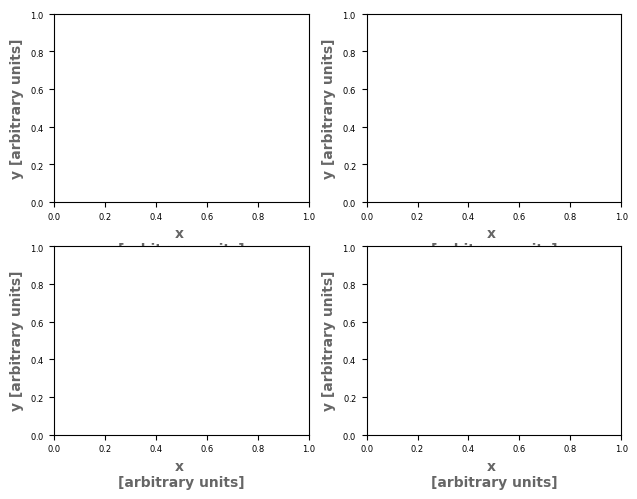

In [40]:
from myutils.plotters import StandardPlotter
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
ax_pref = {'xlabel': 'x \n[arbitrary units]',
           'ylabel': 'y [arbitrary units]',
           'factor': 4}

sp = StandardPlotter(fig=fig,
                     ax=axes,
                     ax_pref=ax_pref)
sp.fig.savefig('remove.png')
sp.show()


As you see, in the previous output, the x labels of the figures at the top are cut and the x labels of the bottom seems to be ok. However, when we check the figure that we just saved from it, we see that the labels of the bottom are also cut:

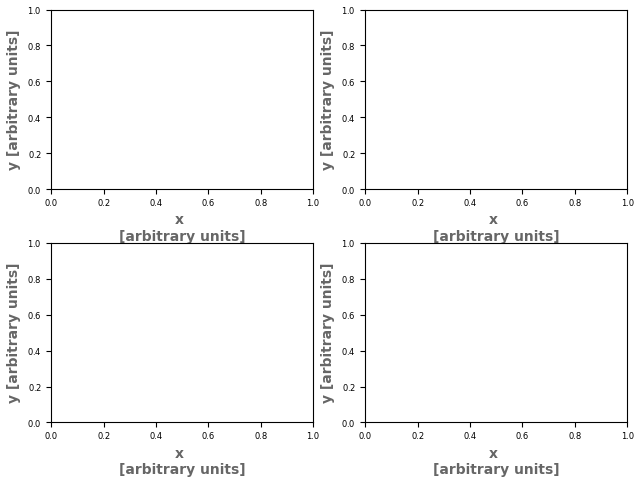

In [43]:
from IPython.display import Image, display
display(Image(filename='remove.png'))

Adjusting the location of your axis never was as easy. You can use the method "setting_borders" in StandardPlot

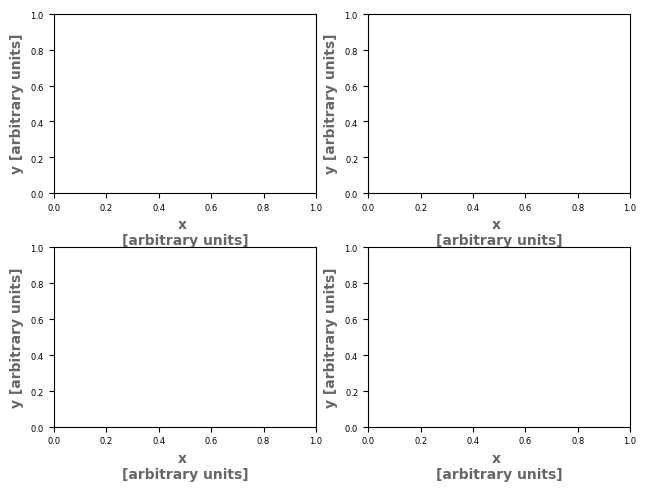

In [42]:
from myutils.plotters import StandardPlotter
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
ax_pref = {'xlabel': 'x \n[arbitrary units]',
           'ylabel': 'y [arbitrary units]',
           'factor': 4}

sp = StandardPlotter(fig=fig,
                     ax=axes,
                     ax_pref=ax_pref)

#axtmp = sp.setting_borders(showframe=True) # shows the frame
# axtmp = sp.setting_borders(showframe=True, majordelta=0.1) # shows the limits
#axtmp = sp.setting_borders(borders={'right': 0.9}, showframe=True, majordelta=0.1) # moves the right side to the border
#axtmp = sp.setting_borders(borders={'right':0.9, 'top':0.9, 'left':0.1, 'bottom':0.1}, showframe=True, majordelta=0.1) # center the figure
#axtmp = sp.setting_borders(borders={'right':0.9, 'top':0.9, 'left':0.1, 'bottom':0.1}, showframe=True, majordelta=0.01) # mess up the numbers
#axtmp = sp.setting_borders(borders={'right':0.9, 'top':0.9, 'left':0.1, 'bottom':0.1}, showframe=True, majordelta=0.1, minordelta=0.02) # mess up the numbers
axtmp = sp.setting_borders(borders={'right':0.98, 'top':0.98, 'left':0.08, 'bottom':0.12, 'hspace': 0.3, 'wspace': 0.2}) # center the figure 


sp.show()
sp.fig.savefig('remove.png')


## Adding data

ValueError: x and y must have same first dimension, but have shapes (1,) and (3,)

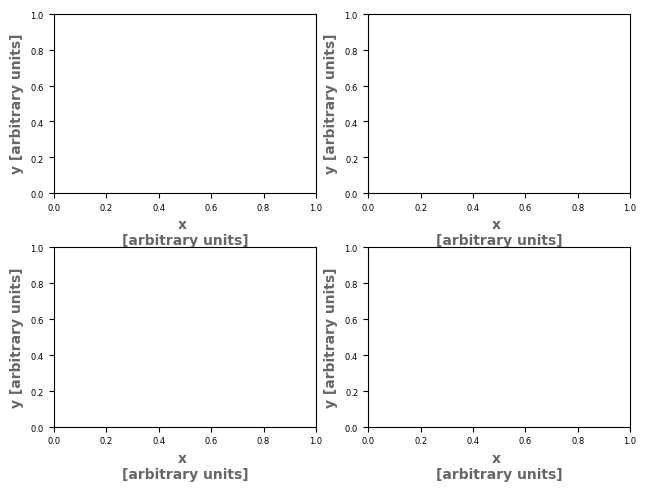

In [1]:
from myutils.plotters import StandardPlotter
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)
ax_pref = {'xlabel': 'x \n[arbitrary units]',
           'ylabel': 'y [arbitrary units]',
           'factor': 4}

sp = StandardPlotter(fig=fig,
                     ax=axes,
                     ax_pref=ax_pref)

axtmp = sp.setting_borders(borders={'right':0.98,
                                    'top':0.98,
                                    'left':0.08,
                                    'bottom':0.12,
                                    'hspace': 0.3,
                                    'wspace': 0.2})

# sp.plot_data(np.random.random(10)) # one list of data
sp.plot_data(np.random.random(10), np.random.random(10)) # one list of data
sp.show()

